# Math for Machine Learning Exercise

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from PIL import Image
import cv2
import sys

In [19]:
from ipywidgets import interact, interactive, interact_manual
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [20]:
# replace images with the image you want to compress
images = {
    "Cat": np.asarray(Image.open('data/cat.jpeg')),
    
}

In [21]:
def show_images(img_name):
    'It will show image in widgets'
    print("Loading...")
    plt.title("Image Name: "+img_name+"\n")
    plt.imshow(images[img_name])
    plt.axis('off')
    plt.show()

Loading...


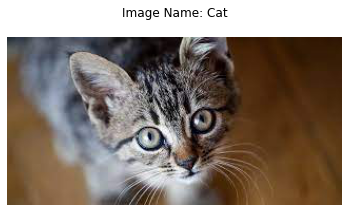

<function __main__.show_images(img_name)>

In [22]:
interact(show_images, img_name=list(images.keys()))

In [23]:
compressed_image = None
text = None

# SVD practice

In [25]:
def on_save_clicked(b):
    img_name = text.value.split()[0]
    print("saving image...")
    compressed_image.save(img_name+".jpg")
    print("image saved.")
    
    
def compress_image(img_name, k):
    print("processing...")
    global text
    global compressed_image
    img = images[img_name]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    print("compressing...")
    gur,gsr,gvr = svd(img_gray, full_matrices=False)

    grr = np.dot(gur[:,:k],np.dot(np.diag(gsr[:k]), gvr[:k,:]))
    
    print("arranging...")
    rimg = np.zeros(img.shape)
    rimg = grr
    print(rimg)
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            if col < 0:
                rimg[ind1,ind2] = abs(col)
            if col > 255:
                rimg[ind1,ind2] = 255

    compressed_image = rimg.astype(np.uint8)
    
    plt.title("Image Name: "+img_name+"\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    
    save = widgets.Button(description="Save image!", button_style='danger')
    save.on_click(on_save_clicked)
    
    compressed_image = Image.fromarray(compressed_image)
    
    text = widgets.Text(value="image_save",placeholder='Enter image name...',description='Image name')
    display(text)
    display(save)
    

processing...
compressing...
arranging...
[[43. 44. 45. ... 19. 18. 18.]
 [46. 46. 47. ... 19. 19. 18.]
 [50. 51. 52. ... 19. 19. 19.]
 ...
 [65. 65. 65. ... 57. 57. 56.]
 [65. 65. 65. ... 58. 58. 57.]
 [65. 65. 65. ... 59. 58. 58.]]


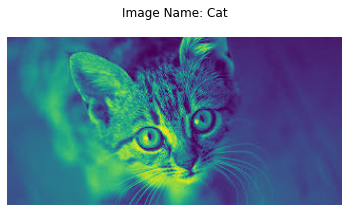

Text(value='image_save', description='Image name', placeholder='Enter image name...')

Button(button_style='danger', description='Save image!', style=ButtonStyle())

<function __main__.compress_image(img_name, k)>

In [26]:
interact(compress_image, img_name=list(images.keys()), k = (200,200))

processing...
compressing...
arranging...
[[53.53152675 53.82918334 54.42218575 ... 15.91711373 15.39939706
  14.83151813]
 [55.49832304 55.87960171 56.60289853 ... 16.32658751 15.9721195
  15.49301752]
 [51.78261526 52.25976392 53.12210527 ... 18.08194885 17.47771242
  16.95760957]
 ...
 [66.08455045 66.13796945 66.17702632 ... 54.87813798 53.76548734
  52.65889869]
 [65.84446507 65.86449513 65.90110158 ... 54.96466106 53.87697604
  52.77833567]
 [66.02904559 66.00676014 66.00145637 ... 54.77165546 53.69052967
  52.61022316]]


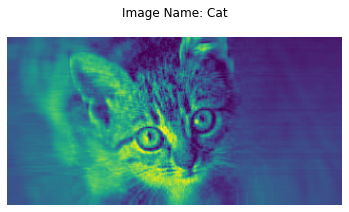

Text(value='image_save', description='Image name', placeholder='Enter image name...')

Button(button_style='danger', description='Save image!', style=ButtonStyle())

<function __main__.compress_image(img_name, k)>

In [27]:
interact(compress_image, img_name=list(images.keys()), k = (1,50))

processing...
compressing...
arranging...
[[67.44132296 67.60759426 67.76975466 ... 22.39103328 22.13211865
  21.98693906]
 [68.90647894 69.07698106 69.23629236 ... 22.68849469 22.42402688
  22.27560826]
 [67.33500114 67.45738604 67.51568402 ... 22.2376521  21.98599319
  21.83968028]
 ...
 [64.75600711 64.74422672 64.97127678 ... 41.10605068 40.75800237
  40.39934921]
 [64.6980872  64.67788422 64.88206375 ... 40.97967563 40.63675427
  40.28216782]
 [64.61315952 64.58842691 64.77832892 ... 40.79714681 40.4586915
  40.10855591]]


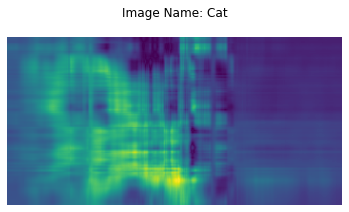

Text(value='image_save', description='Image name', placeholder='Enter image name...')

Button(button_style='danger', description='Save image!', style=ButtonStyle())

<function __main__.compress_image(img_name, k)>

In [28]:
interact(compress_image, img_name=list(images.keys()), k = (1,10))

# PCA practice

## For image

In [63]:
from sklearn.decomposition import PCA
import matplotlib.image as mpimg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(702, 1920, 3)
(702, 5760)
(702, 100)
0.9852569082497238


True

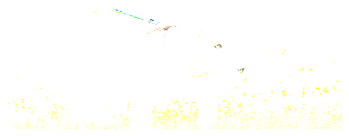

In [84]:
img_path = 'data/dog.jpg'
img = mpimg.imread(img_path)
coeff = 100
print(img.shape)
plt.axis('off')
plt.imshow(img)

img_r = np.reshape(img, (img.shape[0], img.shape[1] * img.shape[2]))
print(img_r.shape)

ipca = PCA(coeff).fit(img_r)
img_c = ipca.transform(img_r)
print(img_c.shape)
print(np.sum(ipca.explained_variance_ratio_))
temp = ipca.inverse_transform(img_c)
temp = np.reshape(temp, img.shape)

plt.imshow(temp)
cv2.imwrite('outputs/dog_compress.jpg',temp)

## For audio

In [52]:
from sklearn.decomposition import PCA
from numpy import linalg as la
import wav
from scipy.io import wavfile

In [50]:
def getKey(item):
    return item[0]

def reshapeVect(soundVector,matrixSize):
    vectorSize = len(soundVector)
    filling = matrixSize - np.mod(vectorSize, matrixSize) #zeros to add in the padded vector
    paddedVector = np.lib.pad(soundVector, (0, filling), 'constant', constant_values=0)
    initialMatrix = paddedVector.reshape((len(paddedVector) // matrixSize, matrixSize)) # Reshape soundVector to be a matrix of dimension matrixSize
    return initialMatrix

def compress(soundVector, coeff, matrixSize):
    #Reshaping soundVector into a matrix
    vectorSize = len(soundVector)
    filling = matrixSize - np.mod(vectorSize, matrixSize) #zeros to add in the padded vector
    paddedVector = np.lib.pad(soundVector, (0, filling), 'constant', constant_values=0)
    initialMatrix = paddedVector.reshape((len(paddedVector) // matrixSize, matrixSize)) # Reshape soundVector to be a matrix of dimension matrixSize

    #PCA
    pca = PCA(n_components=coeff)
    pca.fit(initialMatrix)
    compressedMatrix = pca.transform(initialMatrix)
    decompressed = pca.inverse_transform(compressedMatrix).reshape((len(paddedVector)))
    decompressed = decompressed[0:-filling]
    return pca, compressedMatrix, decompressed

def memorySpace(initialMatrix, compressedMatrix):
    iSize = np.size(initialMatrix) #initialMatrix.shape[0]*initialMatrix.shape[1]
    cSize = np.size(compressedMatrix) #compressedMatrix.shape[0]*compressedMatrix.shape[1]
    return 100*(iSize-cSize)/iSize

def calculateDistortion(initialMatrix,compressedMatrix):
    iVec = initialMatrix.flatten()
    cVec = compressedMatrix.flatten()
    n=0
    if(len(iVec)<len(cVec)):
        n = len(iVec)
    else :
        n = len(cVec)
    d=0
    for i in range (n-1):
        d+=(iVec[i]-cVec[i])*(iVec[i]-cVec[i])
    d/=n
    return d

In [55]:
def visualize_sound(path):
    fs,x = wavfile.read(path)
    y = np.linspace(0,len(x)/float(fs), len(x))
    ya = np.max(np.absolute(x))
    plt.plot(y, x, color="#004225")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.ylim(-ya, ya)
    plt.xlim(0, y[-1])
    plt.show()

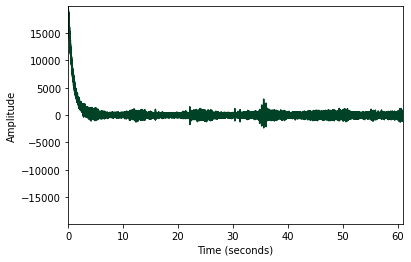

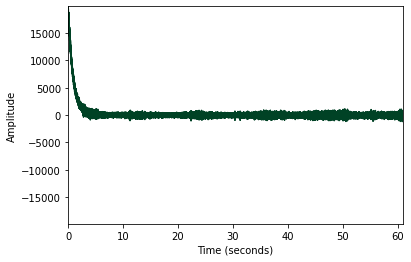

saved  89.99955919152308 % of memory space
distortion =  4337.71432398603


In [57]:
path = "data/sound_bird.wav"
visualize_sound(path)
h, sample = wav.open(path)
x=0
columnsToKeep = 19
matrixSize = 190
if x == 0:
    pca, matrix, out = compress(sample,columnsToKeep,matrixSize)
    out = out.astype(int)
    wav.save("output/compressed.wav",h,out)
    visualize_sound("compressed.wav")
    print("saved ", memorySpace(out,matrix),"% of memory space")
    print("distortion = ",calculateDistortion(reshapeVect(sample,matrixSize),out))